In [15]:
import importlib
import TD3.clientSide
importlib.reload(TD3.clientSide)

from TD3.clientSide import clientSide


In [16]:
from PIDSim.MultiSystemPIDEnv import MultiSystemPIDEnv
from TD3.clientSide import clientSide
from TD3.TD3Agent import TD3Agent
import numpy as np
import torch

In [17]:
action_low = np.array([0.0, 0.0, 0.0])
action_high = np.array([10.0, 3.0, 3.0])

In [18]:
sample_env = MultiSystemPIDEnv()
sample_state = sample_env.reset()
state_dim = len(sample_state)

state_shape = (state_dim,)

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

action_low = np.array([0, 0, 0])
action_high = np.array([10, 5, 5])
state_shape = (5,)

agent = TD3Agent(
    state_dim=5,
    action_dim=3,
    action_low=action_low,
    action_high=action_high,
    device=device,
    state_shape=state_shape
)


In [20]:
env = MultiSystemPIDEnv
client = clientSide(env, agent)


🔁 Starting Training Session 1/2
Session 1, Episode 10, Reward: -6.97, Noise: -0.1293
Session 1, Episode 20, Reward: -8.10, Noise: -0.1408
💾 Auto-saved model at Session 1, Episode 25 (Avg Reward: -3877612.21)
Session 1, Episode 30, Reward: -16.68, Noise: -0.0790
Session 1, Episode 40, Reward: -14.64, Noise: -0.0814
💾 Auto-saved model at Session 1, Episode 50 (Avg Reward: -13.41)
Session 1, Episode 50, Reward: -16.14, Noise: -0.0103
Session 1, Episode 60, Reward: -16.46, Noise: 0.3029
Session 1, Episode 70, Reward: -13.56, Noise: -0.0843
💾 Auto-saved model at Session 1, Episode 75 (Avg Reward: -11.30)
Session 1, Episode 80, Reward: -10.32, Noise: -0.0195
Session 1, Episode 90, Reward: -12.08, Noise: 0.1477
💾 Auto-saved model at Session 1, Episode 100 (Avg Reward: -12.14)
Session 1, Episode 100, Reward: -16.22, Noise: -0.1755
✅ Model saved after session 1 (Avg Reward: -969412.27)


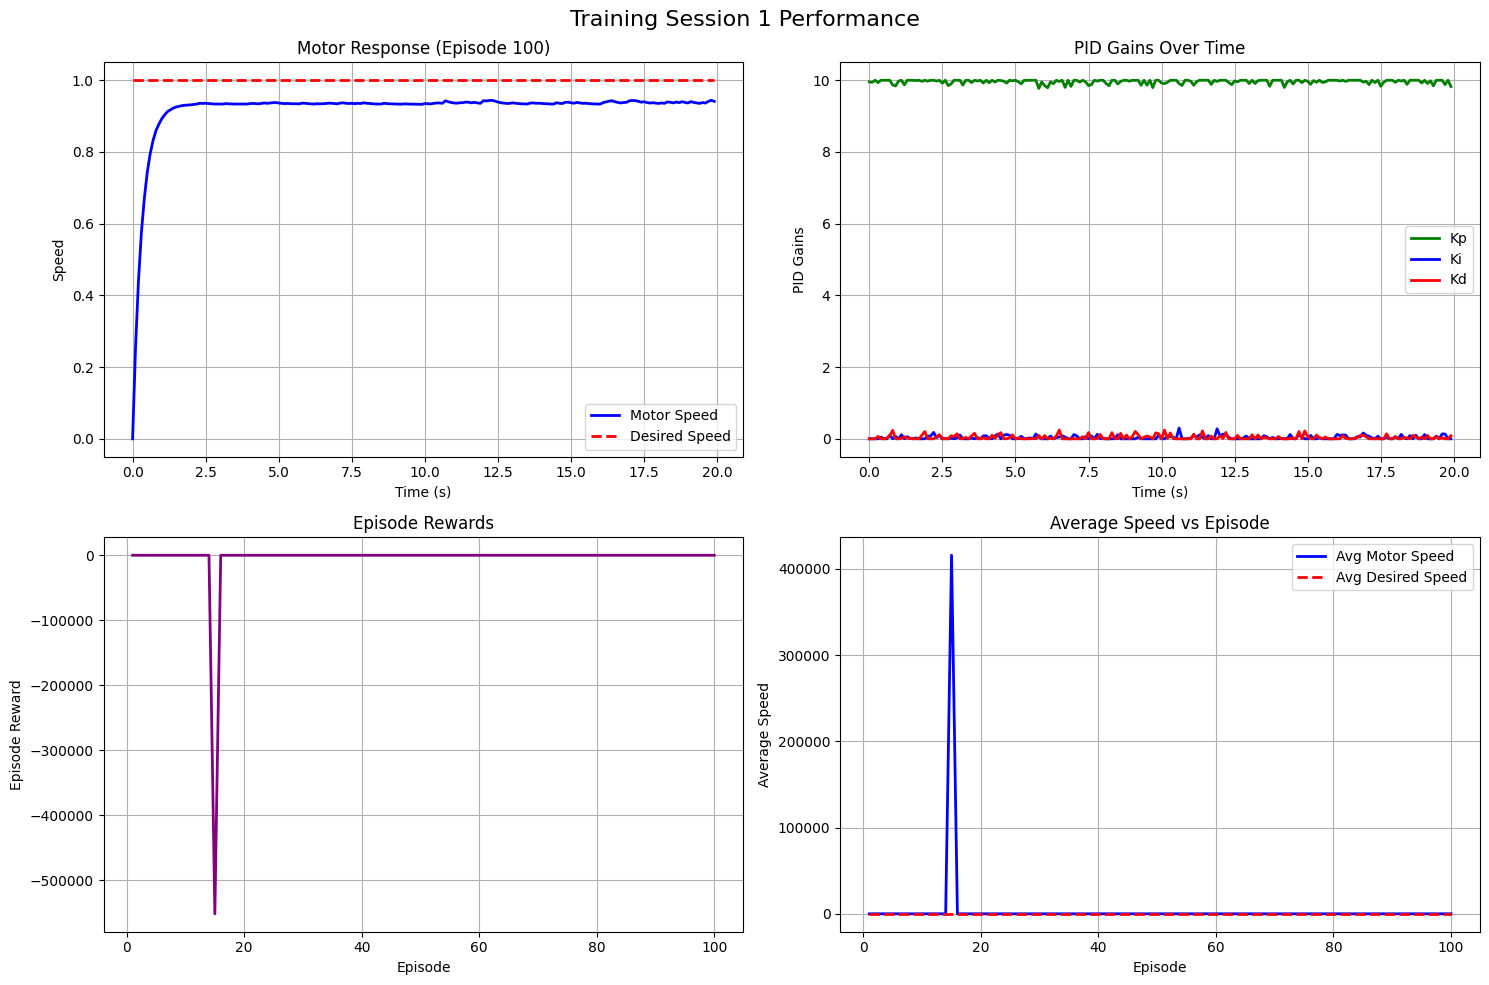


📊 Session 1 Summary:
   Average Episode Reward: -5513.03
   Best Episode Reward: -0.00
   Worst Episode Reward: -551208.40
   Average Tracking Error: 4159.0638

🔁 Starting Training Session 2/2
Session 2, Episode 10, Reward: -11.87, Noise: 0.0131
Session 2, Episode 20, Reward: -20.58, Noise: -0.0311
💾 Auto-saved model at Session 2, Episode 25 (Avg Reward: -11.85)
Session 2, Episode 30, Reward: -12.00, Noise: 0.0147
Session 2, Episode 40, Reward: -33.89, Noise: -0.2522
💾 Auto-saved model at Session 2, Episode 50 (Avg Reward: -32.53)
Session 2, Episode 50, Reward: -118.79, Noise: 0.0788
Session 2, Episode 60, Reward: -7.66, Noise: 0.2014
Session 2, Episode 70, Reward: -130.14, Noise: -0.0929
💾 Auto-saved model at Session 2, Episode 75 (Avg Reward: -47.72)
Session 2, Episode 80, Reward: -110.18, Noise: 0.0375
Session 2, Episode 90, Reward: -87.68, Noise: 0.0460
💾 Auto-saved model at Session 2, Episode 100 (Avg Reward: -77.60)
Session 2, Episode 100, Reward: -96.83, Noise: 0.0454
✅ Model s

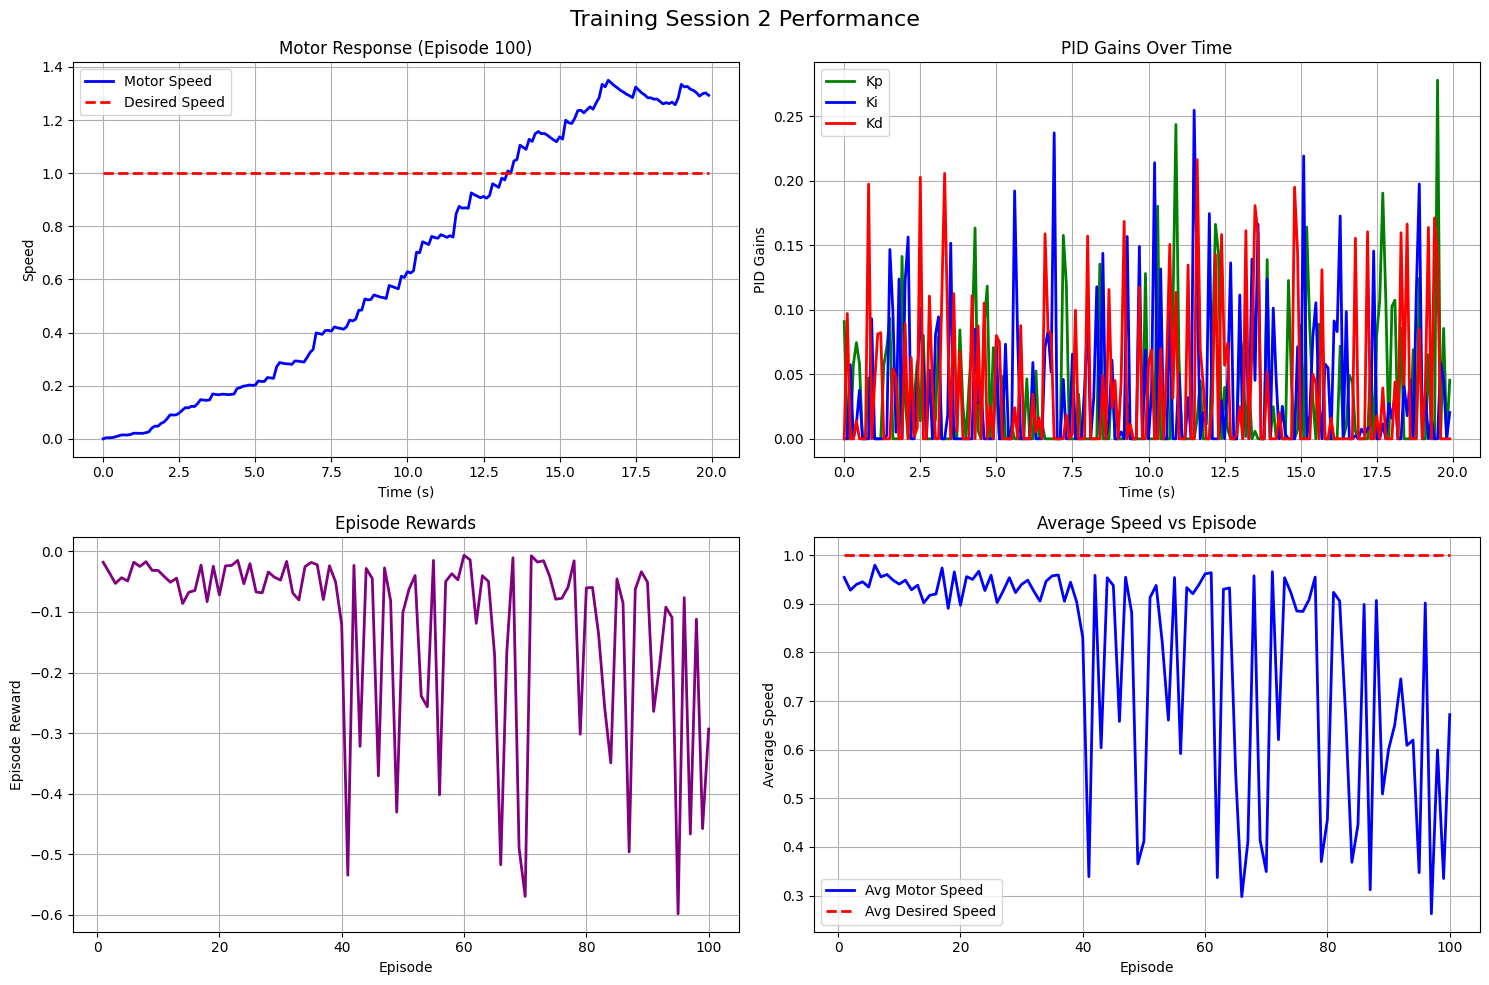


📊 Session 2 Summary:
   Average Episode Reward: -0.12
   Best Episode Reward: -0.01
   Worst Episode Reward: -0.60
   Average Tracking Error: 0.2055


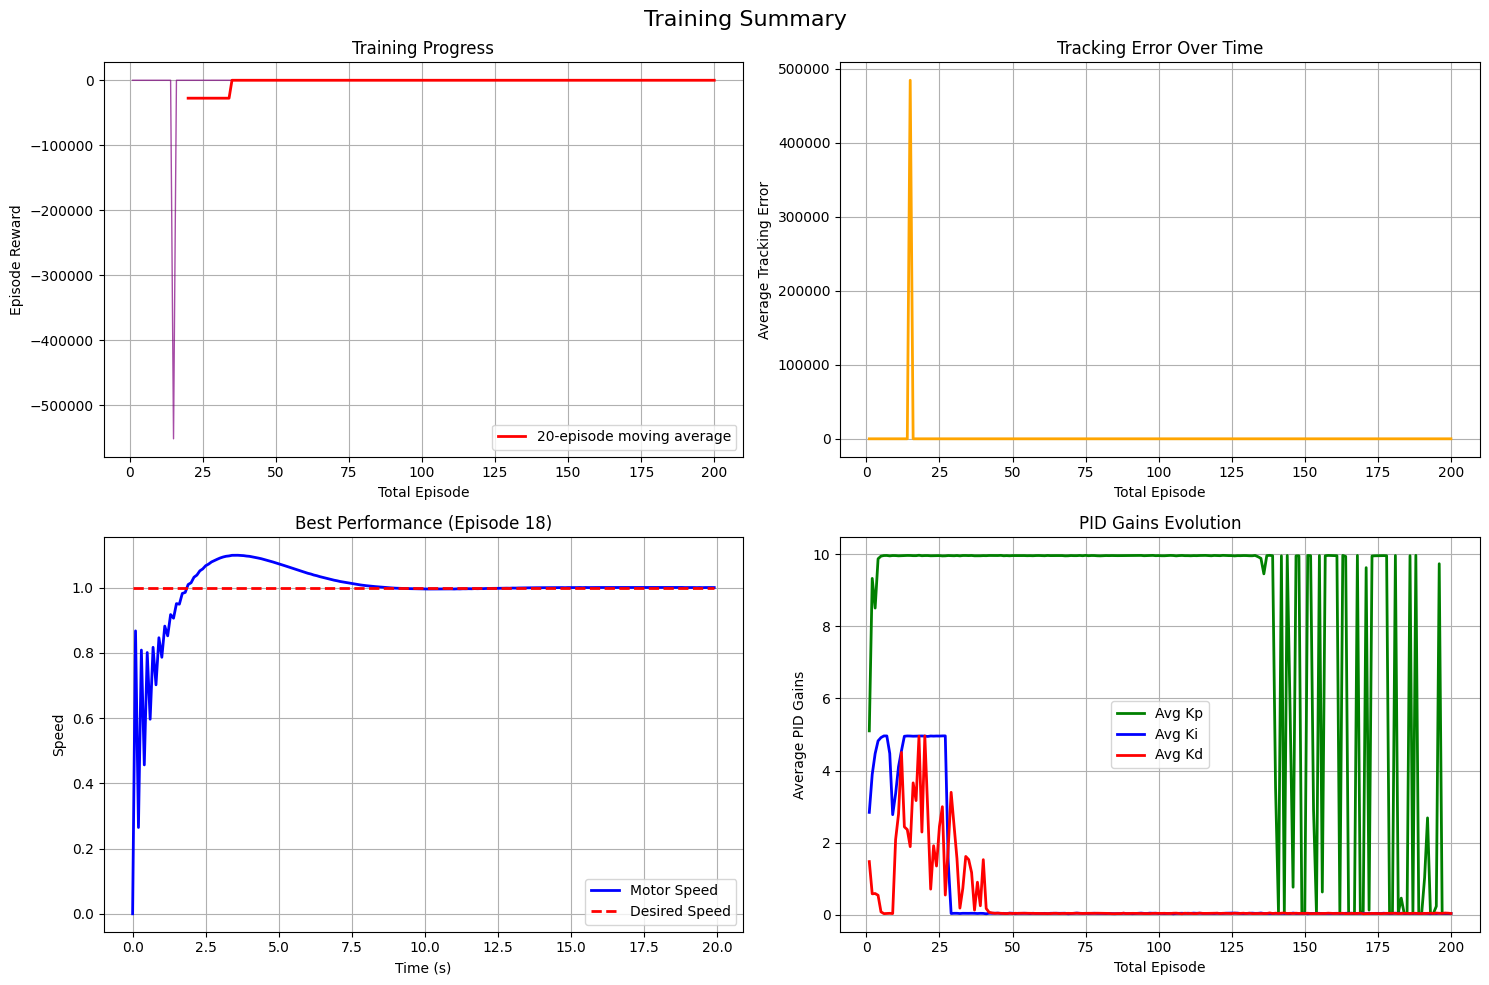


🎯 Overall Training Summary:
   Total Episodes: 200
   Best Episode Reward: -0.00
   Average Episode Reward: -2756.57
   Final Average Tracking Error: 0.4841
   Best Tracking Error: 0.0146


In [21]:
# In your notebook, after creating the agent and client:
try:
    client.train_agent(
        num_sessions=2,  # Start small to test
        episodes_per_session=100,  # Start small to test
        batch_size=100,
        save_path='./SavedModels',
        auto_save_interval=25,
        save_best_only=False  # Save all checkpoints for now
    )
except Exception as e:
    print(f"Error: {e}")

In [8]:
# Quick hyperparameter tuning
focused_param_grid = {
    'gamma': [0.98, 0.99, 0.995],
    'actor_lr': [5e-5, 1e-4, 2e-4],
    'critic_lr': [5e-5, 1e-4, 2e-4],
    'policy_noise': [0.15, 0.2, 0.25]
}

print("🎯 Starting focused hyperparameter tuning...")
best_config, tuning_results = client.hyperparameter_tuning(
    param_grid=focused_param_grid,
    num_trials=3,  # Quick trials
    save_path='./SavedModels'
)

print(f"�� Best configuration: {best_config}")

🎯 Starting focused hyperparameter tuning...
🔍 Starting Hyperparameter Tuning...

🧪 Testing configuration 1/81: {'gamma': 0.98, 'actor_lr': 5e-05, 'critic_lr': 5e-05, 'policy_noise': 0.15}
  Trial 1/3
  Trial 2/3
  Trial 3/3
  Average reward: nan ± nan

🧪 Testing configuration 2/81: {'gamma': 0.98, 'actor_lr': 5e-05, 'critic_lr': 5e-05, 'policy_noise': 0.2}
  Trial 1/3
  Trial 2/3
  Trial 3/3
  Average reward: -8.86 ± 2.20
  🏆 New best configuration!

🧪 Testing configuration 3/81: {'gamma': 0.98, 'actor_lr': 5e-05, 'critic_lr': 5e-05, 'policy_noise': 0.25}
  Trial 1/3
  Trial 2/3
  Trial 3/3
  Average reward: nan ± nan

🧪 Testing configuration 4/81: {'gamma': 0.98, 'actor_lr': 5e-05, 'critic_lr': 0.0001, 'policy_noise': 0.15}
  Trial 1/3
  Trial 2/3
  Trial 3/3
  Average reward: nan ± nan

🧪 Testing configuration 5/81: {'gamma': 0.98, 'actor_lr': 5e-05, 'critic_lr': 0.0001, 'policy_noise': 0.2}
  Trial 1/3
  Trial 2/3
  Trial 3/3
  Average reward: -26.64 ± 2.82

🧪 Testing configuration 

KeyboardInterrupt: 


Test 1: PID gains selected: Kp=9.8992, Ki=0.0000, Kd=0.0000
System Parameters: Mass=3.66, Friction=0.73, Time Constant=1.34


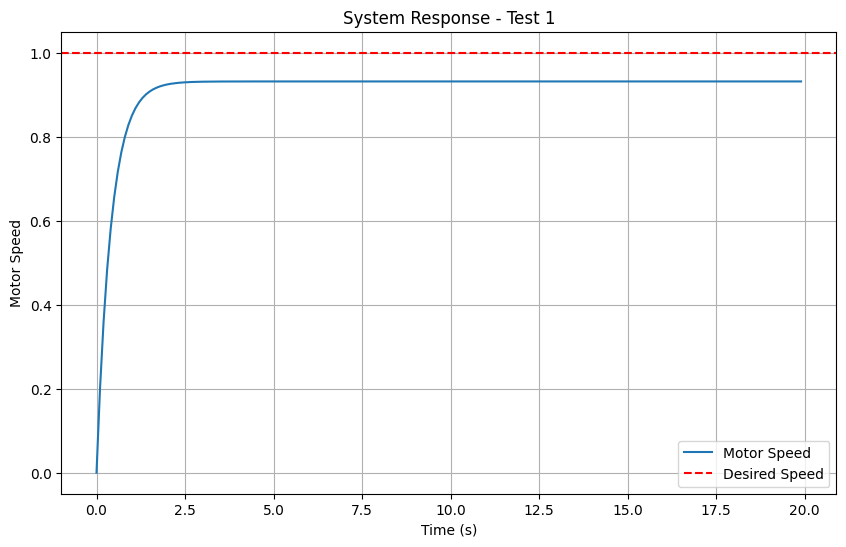


Test 2: PID gains selected: Kp=0.0000, Ki=0.0000, Kd=0.0000
System Parameters: Mass=1.19, Friction=0.64, Time Constant=1.11


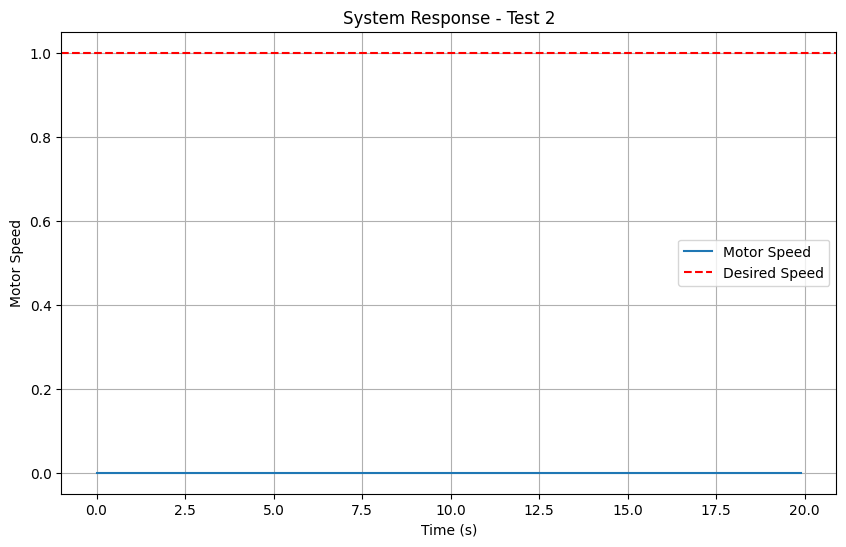


Test 3: PID gains selected: Kp=0.0000, Ki=0.0000, Kd=0.0000
System Parameters: Mass=1.05, Friction=0.90, Time Constant=1.04


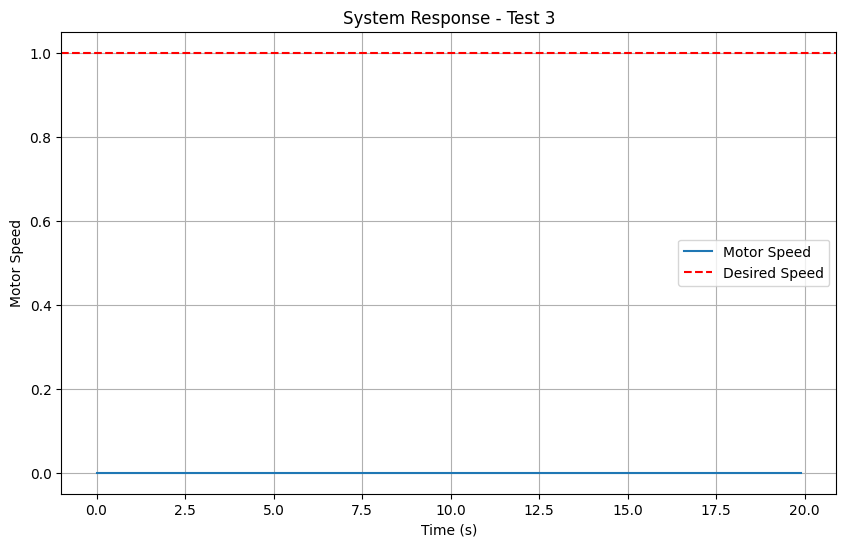


Test 4: PID gains selected: Kp=10.0000, Ki=0.0000, Kd=0.0000
System Parameters: Mass=4.38, Friction=0.22, Time Constant=1.17


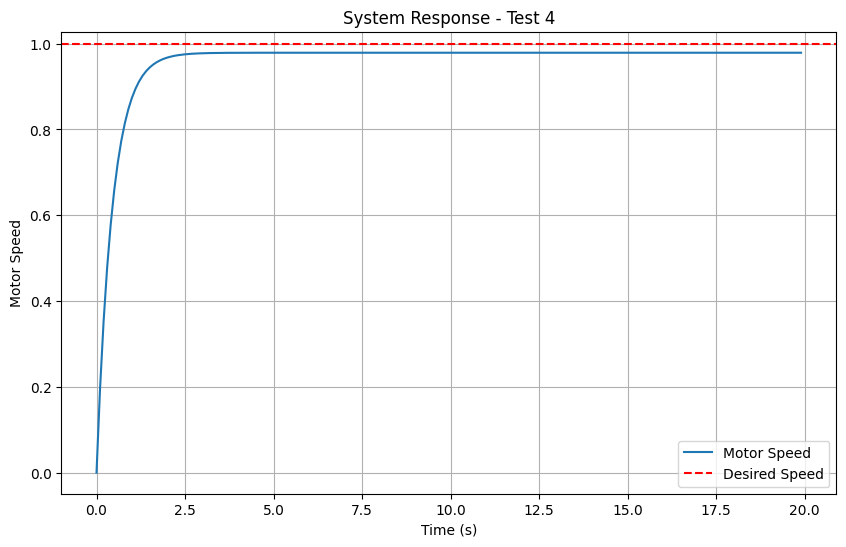


Test 5: PID gains selected: Kp=10.0000, Ki=0.0000, Kd=0.0000
System Parameters: Mass=4.50, Friction=0.49, Time Constant=1.42


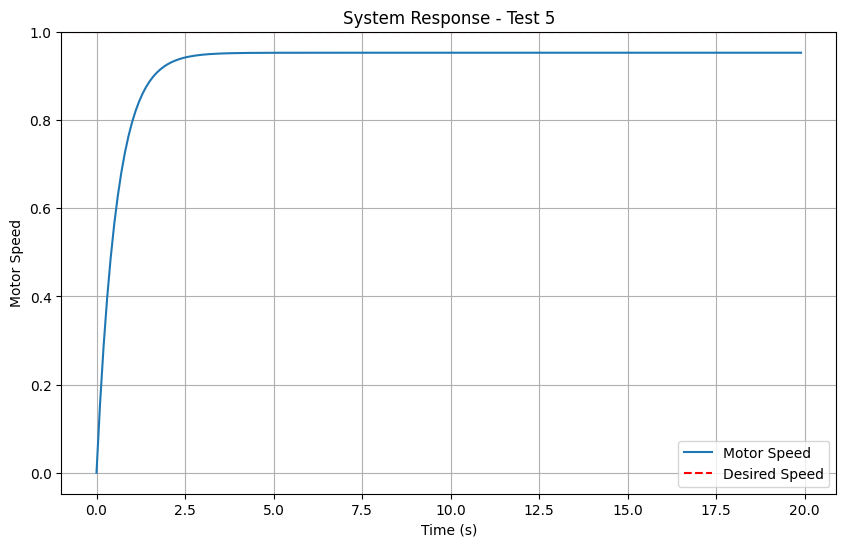

In [22]:
client.test_agent_on_new_system(num_tests=5, total_time=20.0, time_step=0.1)


Test 1: PID gains selected: Kp=9.9820, Ki=4.9442, Kd=0.0000
System Parameters: Mass=3.35, Friction=0.18, Time Constant=1.17


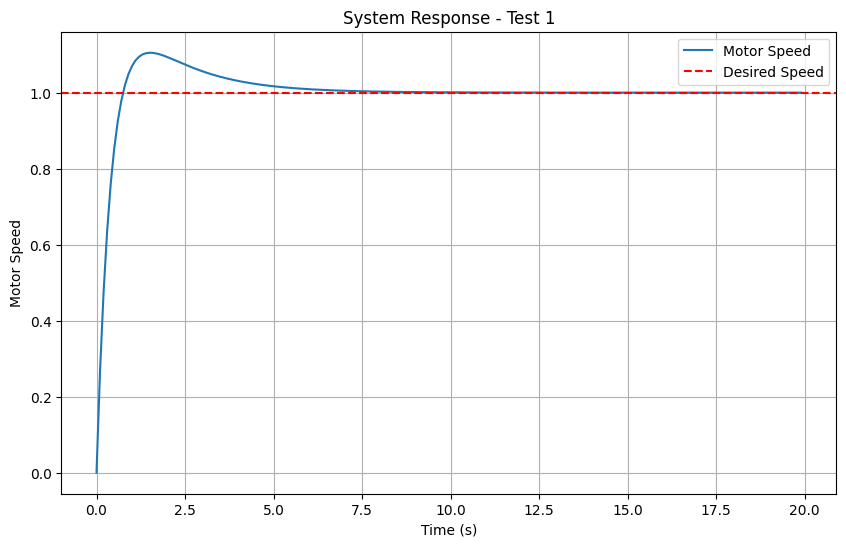


Test 2: PID gains selected: Kp=9.9977, Ki=4.9624, Kd=0.0000
System Parameters: Mass=4.05, Friction=0.39, Time Constant=1.72


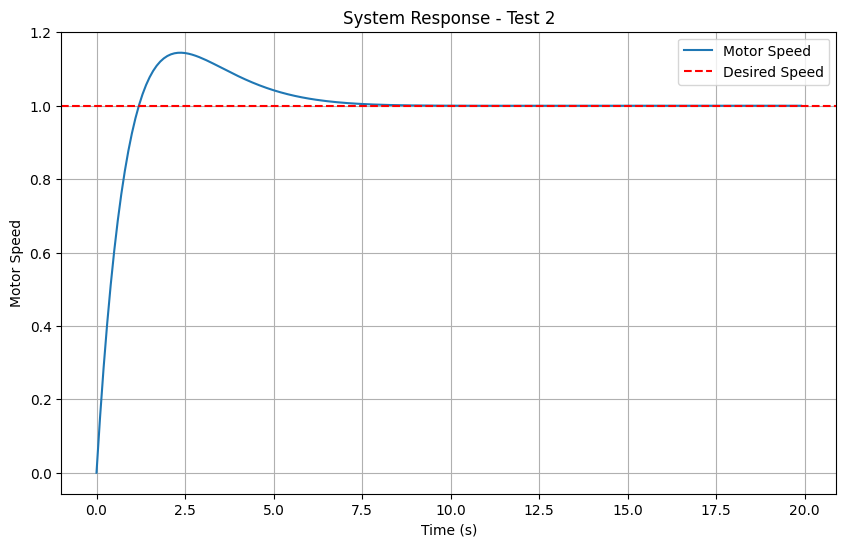


Test 3: PID gains selected: Kp=9.9926, Ki=4.9794, Kd=0.0000
System Parameters: Mass=4.39, Friction=0.52, Time Constant=0.77


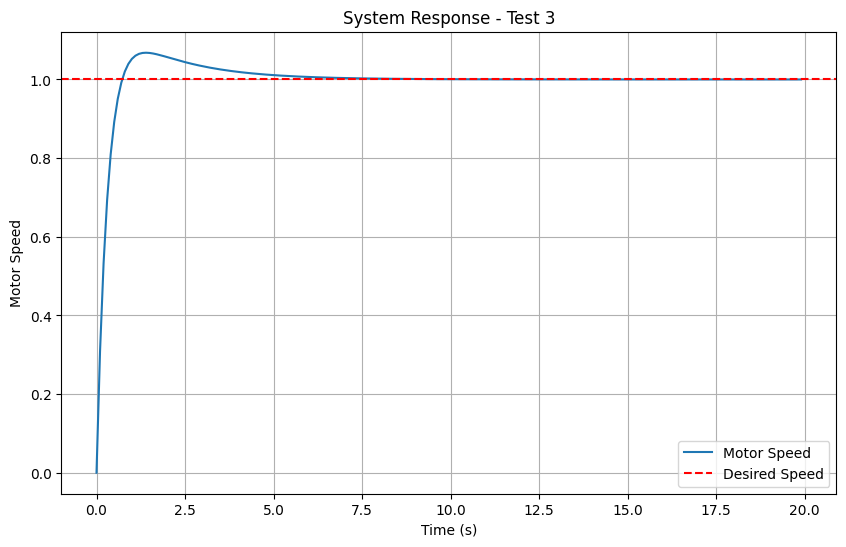


Test 4: PID gains selected: Kp=9.7491, Ki=4.2505, Kd=0.0000
System Parameters: Mass=2.51, Friction=0.38, Time Constant=0.68


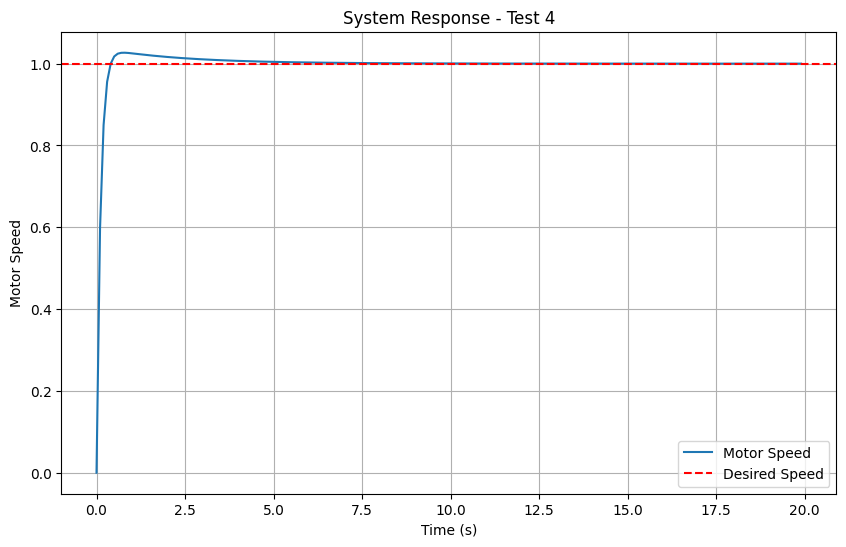


Test 5: PID gains selected: Kp=9.9957, Ki=4.9739, Kd=0.0000
System Parameters: Mass=3.61, Friction=0.21, Time Constant=1.75


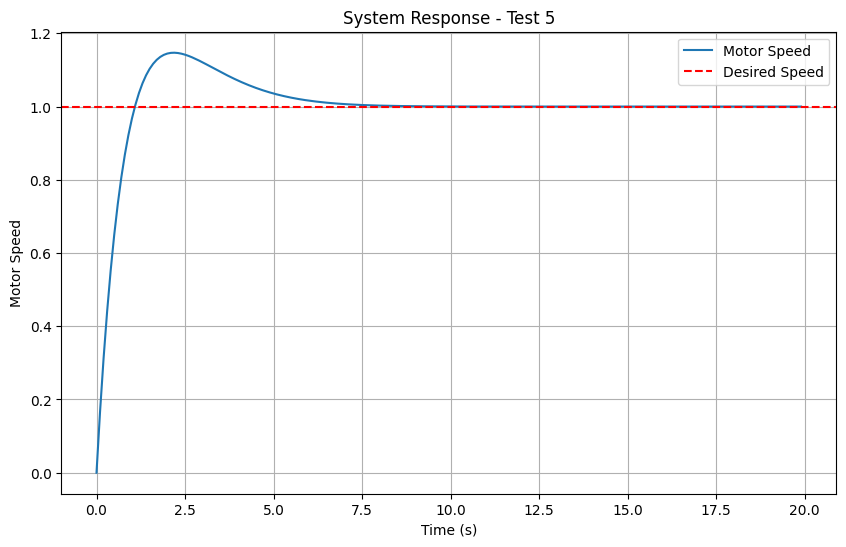


Test 6: PID gains selected: Kp=9.8894, Ki=4.3396, Kd=0.0000
System Parameters: Mass=2.61, Friction=0.41, Time Constant=1.04


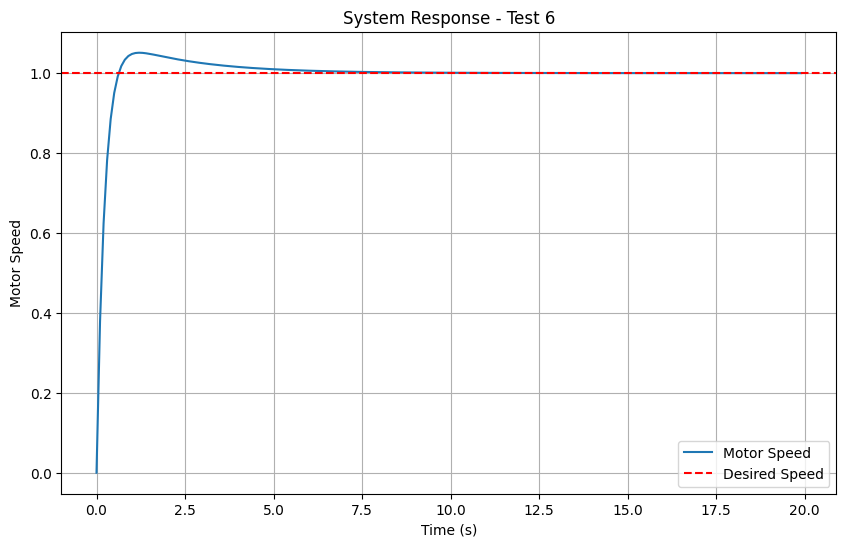


Test 7: PID gains selected: Kp=8.4325, Ki=1.2979, Kd=0.0000
System Parameters: Mass=1.38, Friction=0.87, Time Constant=1.13


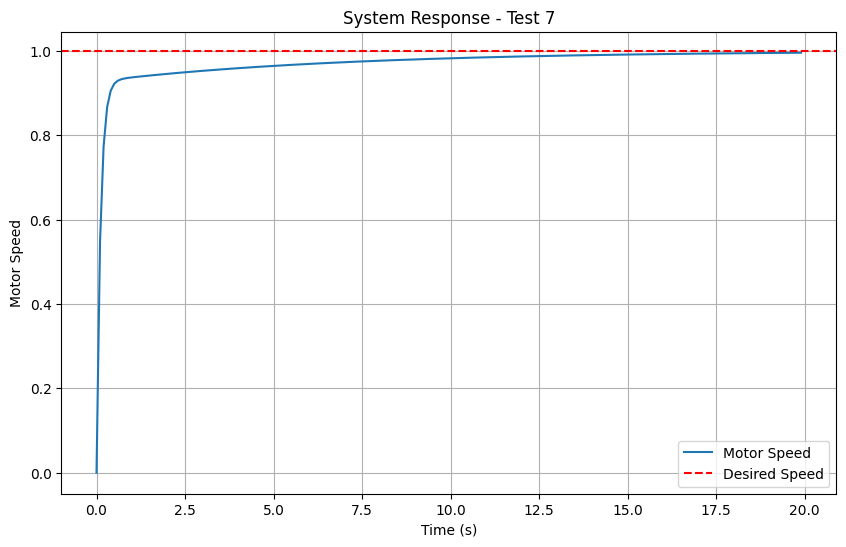


Test 8: PID gains selected: Kp=9.3150, Ki=1.6678, Kd=0.0000
System Parameters: Mass=2.01, Friction=0.89, Time Constant=0.84


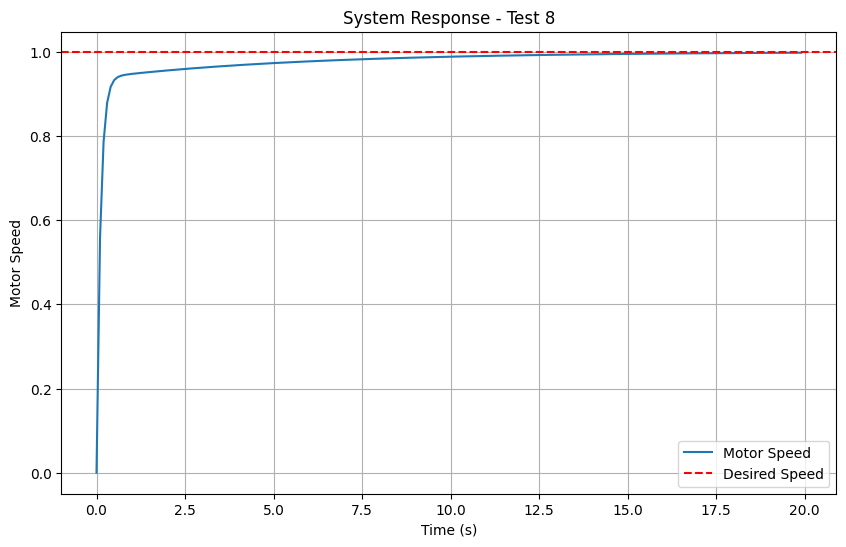


Test 9: PID gains selected: Kp=9.9988, Ki=4.9918, Kd=0.0000
System Parameters: Mass=4.14, Friction=0.20, Time Constant=1.91


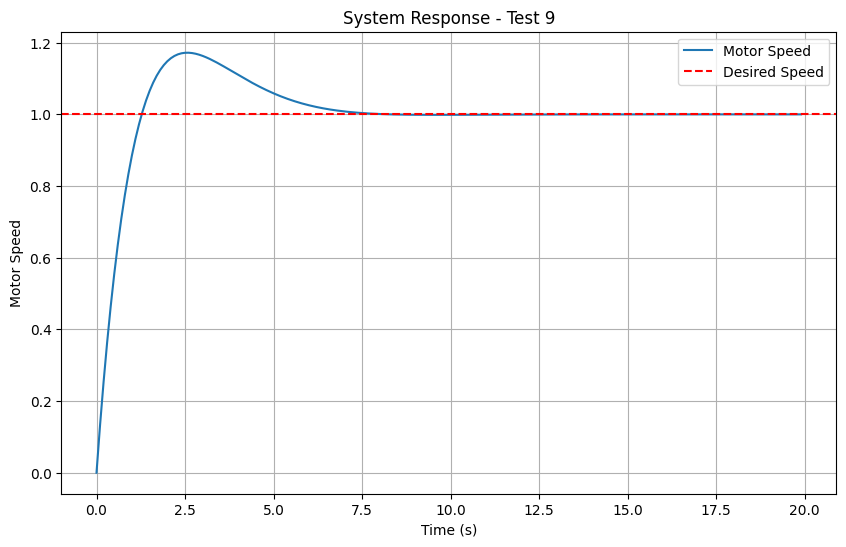


Test 10: PID gains selected: Kp=9.9936, Ki=4.6736, Kd=0.0000
System Parameters: Mass=3.47, Friction=0.70, Time Constant=1.89


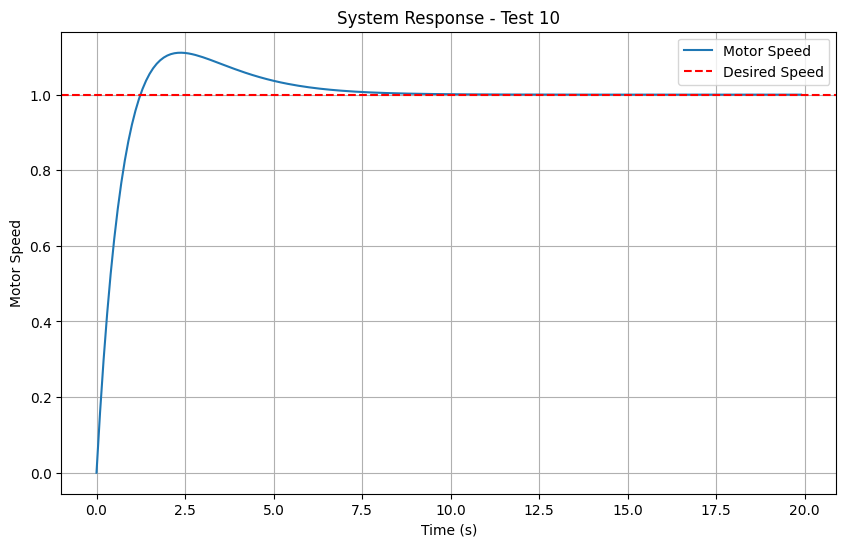


Test 11: PID gains selected: Kp=9.9991, Ki=4.9910, Kd=0.0000
System Parameters: Mass=4.85, Friction=0.48, Time Constant=1.45


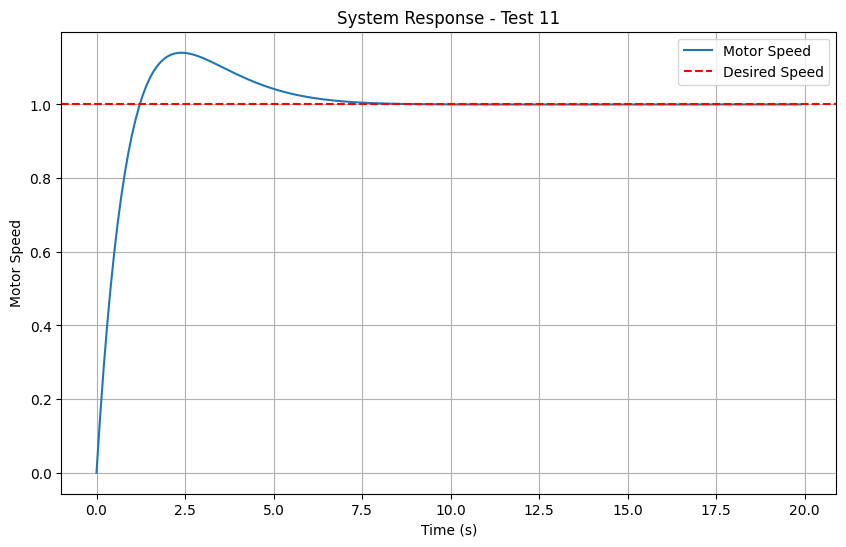


Test 12: PID gains selected: Kp=9.9927, Ki=4.8403, Kd=0.0000
System Parameters: Mass=3.78, Friction=0.56, Time Constant=1.45


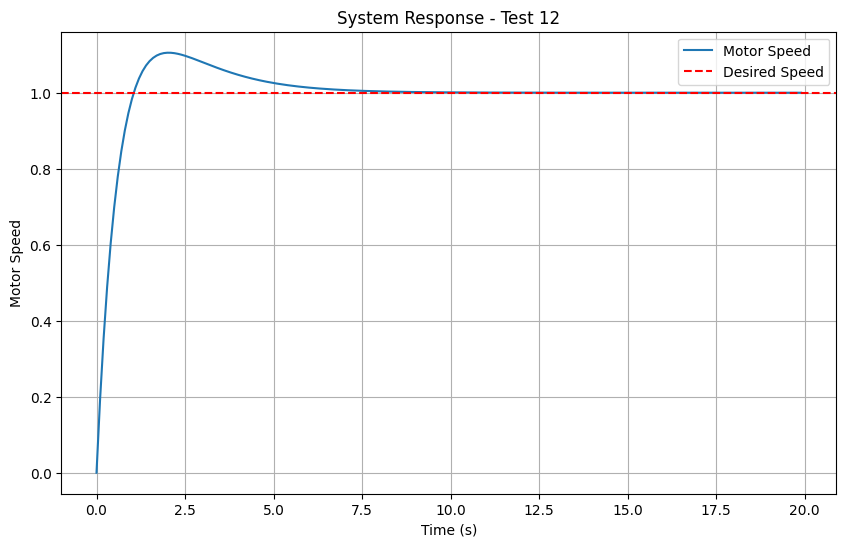


Test 13: PID gains selected: Kp=9.9974, Ki=4.9981, Kd=0.0000
System Parameters: Mass=4.79, Friction=0.27, Time Constant=0.73


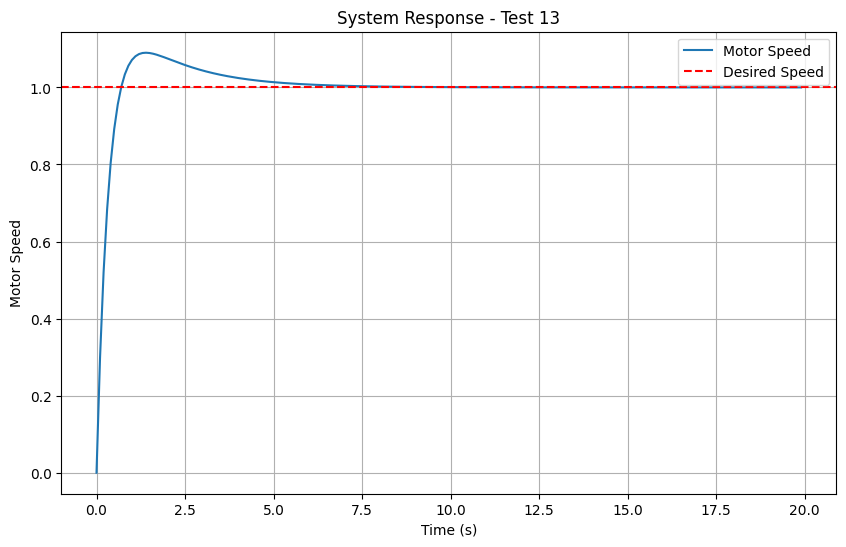


Test 14: PID gains selected: Kp=8.3488, Ki=3.3907, Kd=0.0000
System Parameters: Mass=1.09, Friction=0.11, Time Constant=0.95


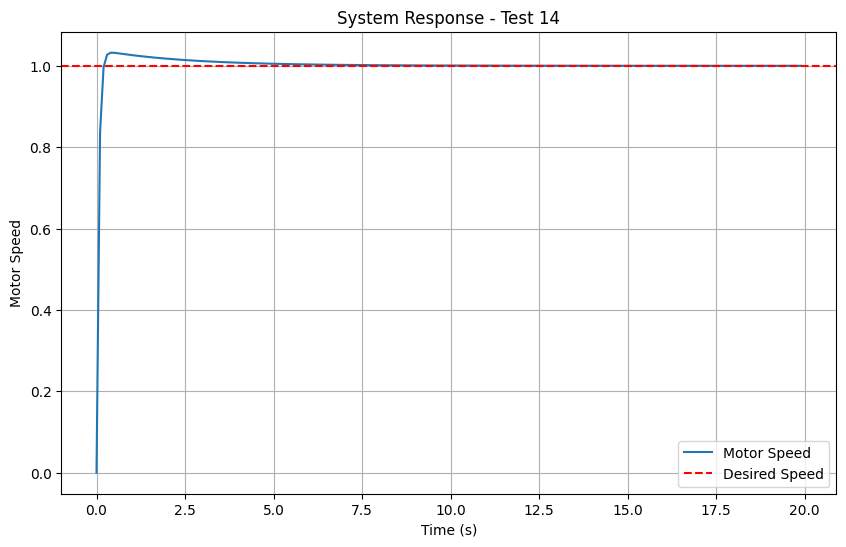


Test 15: PID gains selected: Kp=9.9923, Ki=4.9391, Kd=0.0000
System Parameters: Mass=4.19, Friction=0.60, Time Constant=1.02


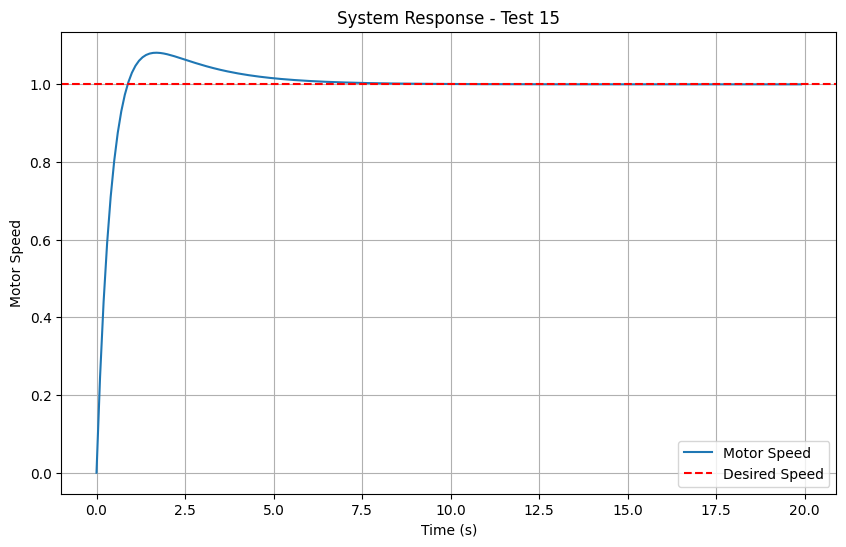


Test 16: PID gains selected: Kp=9.9993, Ki=4.9923, Kd=0.0000
System Parameters: Mass=4.84, Friction=0.44, Time Constant=1.59


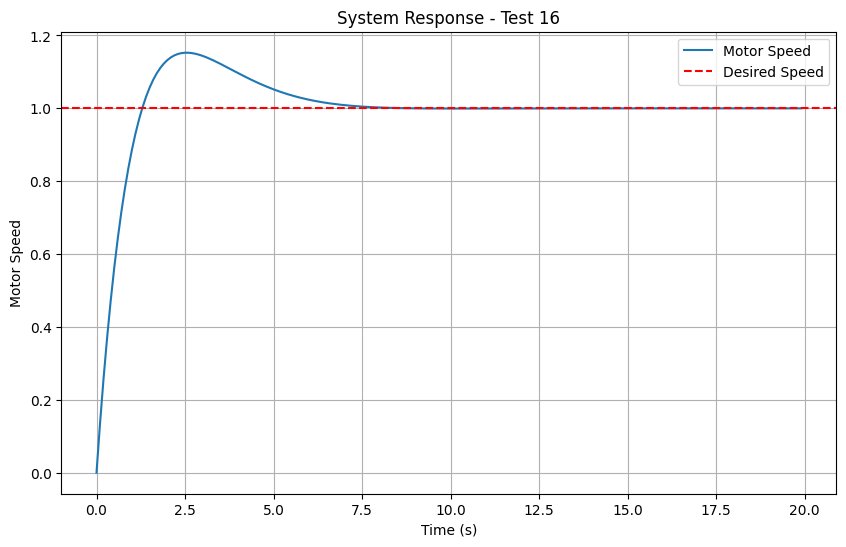


Test 17: PID gains selected: Kp=9.9977, Ki=4.9651, Kd=0.0000
System Parameters: Mass=4.31, Friction=0.49, Time Constant=1.50


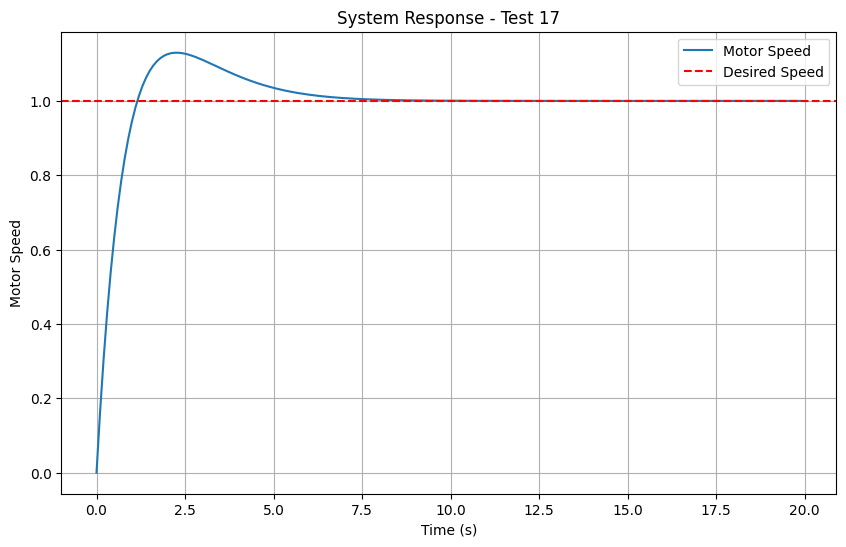


Test 18: PID gains selected: Kp=9.9889, Ki=4.9101, Kd=0.0000
System Parameters: Mass=4.29, Friction=0.78, Time Constant=0.83


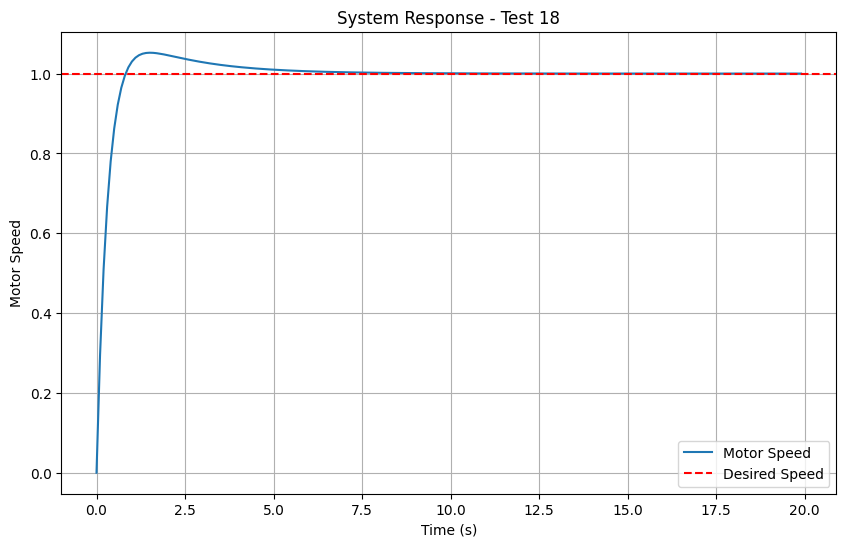


Test 19: PID gains selected: Kp=8.8032, Ki=3.3730, Kd=0.0000
System Parameters: Mass=1.24, Friction=0.24, Time Constant=1.07


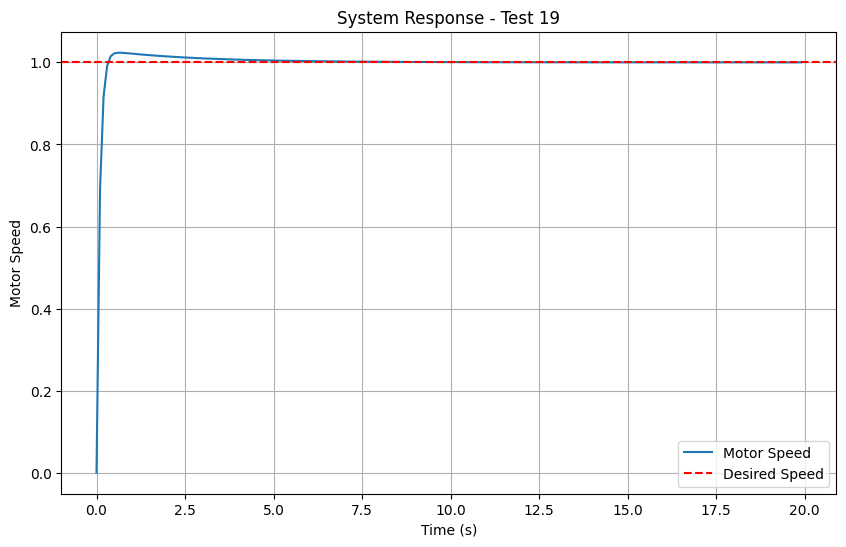


Test 20: PID gains selected: Kp=9.9978, Ki=4.9830, Kd=0.0000
System Parameters: Mass=4.51, Friction=0.46, Time Constant=1.30


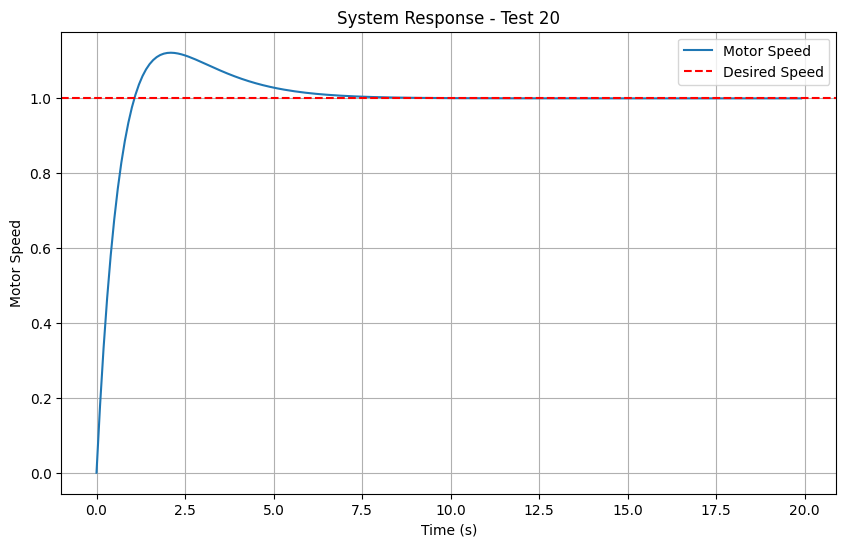

In [10]:
client.test_agent_on_new_system(num_tests=20, total_time=20.0, time_step=0.1)

In [25]:
client.load_model("./SavedModels/current_training_session/session_2_complete/session_2_complete")

✅ Model loaded from: ./SavedModels/current_training_session/session_2_complete/session_2_complete


🧪 Testing agent performance with 5 trials...


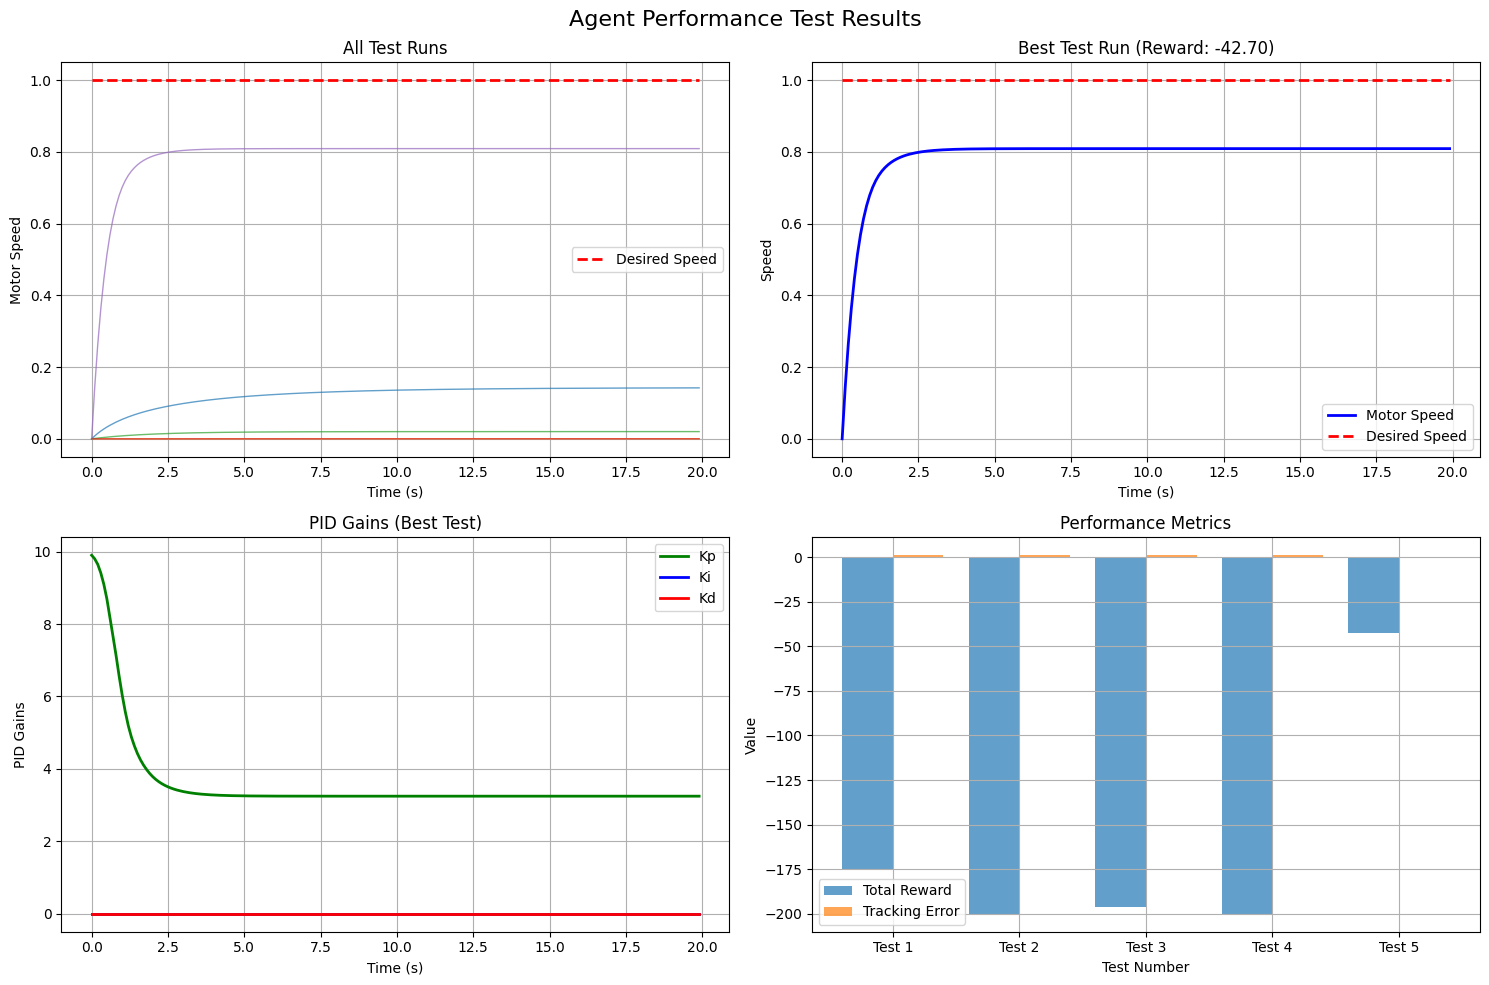


📊 Test Results Summary:
   Average Total Reward: -162.91 ± 60.79
   Best Total Reward: -42.70
   Average Tracking Error: 0.8146 ± 0.3039
   Best Tracking Error: 0.2135


[{'test_num': 1,
  'times': [0.0,
   0.1,
   0.2,
   0.30000000000000004,
   0.4,
   0.5,
   0.6000000000000001,
   0.7000000000000001,
   0.8,
   0.9,
   1.0,
   1.1,
   1.2000000000000002,
   1.3,
   1.4000000000000001,
   1.5,
   1.6,
   1.7000000000000002,
   1.8,
   1.9000000000000001,
   2.0,
   2.1,
   2.2,
   2.3000000000000003,
   2.4000000000000004,
   2.5,
   2.6,
   2.7,
   2.8000000000000003,
   2.9000000000000004,
   3.0,
   3.1,
   3.2,
   3.3000000000000003,
   3.4000000000000004,
   3.5,
   3.6,
   3.7,
   3.8000000000000003,
   3.9000000000000004,
   4.0,
   4.1000000000000005,
   4.2,
   4.3,
   4.4,
   4.5,
   4.6000000000000005,
   4.7,
   4.800000000000001,
   4.9,
   5.0,
   5.1000000000000005,
   5.2,
   5.300000000000001,
   5.4,
   5.5,
   5.6000000000000005,
   5.7,
   5.800000000000001,
   5.9,
   6.0,
   6.1000000000000005,
   6.2,
   6.300000000000001,
   6.4,
   6.5,
   6.6000000000000005,
   6.7,
   6.800000000000001,
   6.9,
   7.0,
   7.100000000000000

In [26]:
client.test_agent_performance()


Test 1: PID gains selected: Kp=0.0000, Ki=0.0000, Kd=0.0000
System Parameters: Mass=3.03, Friction=0.11, Time Constant=0.60


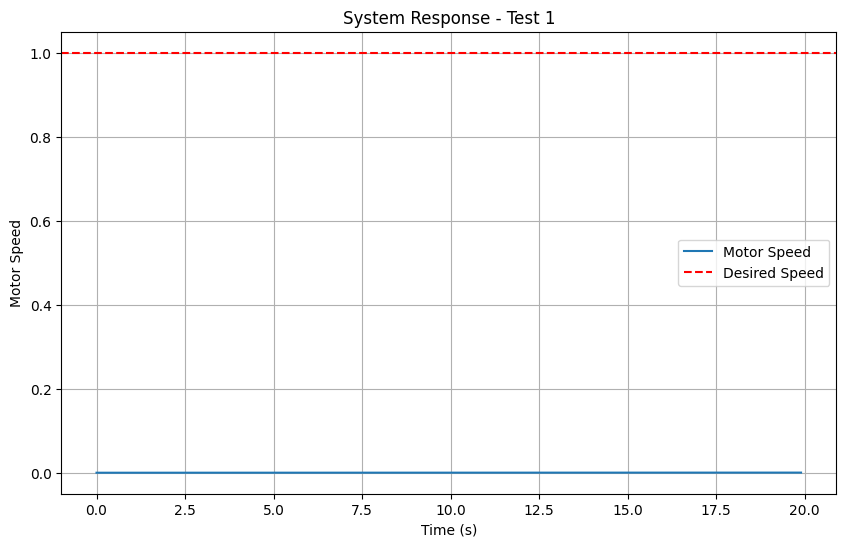


Test 2: PID gains selected: Kp=0.0000, Ki=0.0000, Kd=0.0000
System Parameters: Mass=2.86, Friction=0.56, Time Constant=0.95


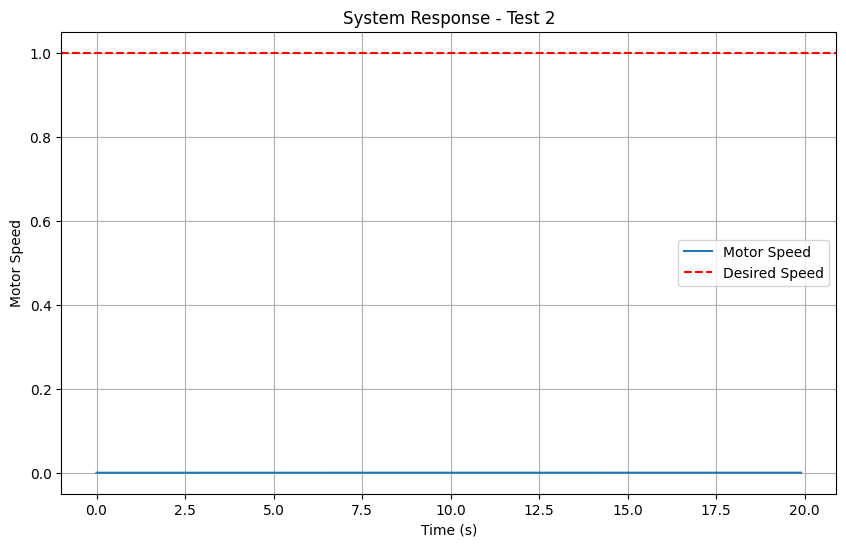


Test 3: PID gains selected: Kp=0.0164, Ki=0.0000, Kd=0.0000
System Parameters: Mass=3.00, Friction=0.55, Time Constant=1.80


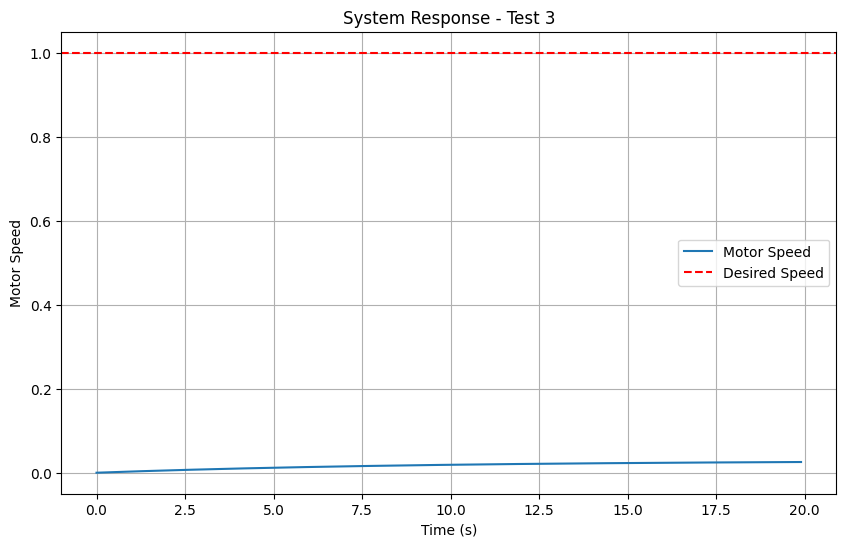


Test 4: PID gains selected: Kp=10.0000, Ki=0.0000, Kd=0.0000
System Parameters: Mass=4.84, Friction=0.46, Time Constant=1.73


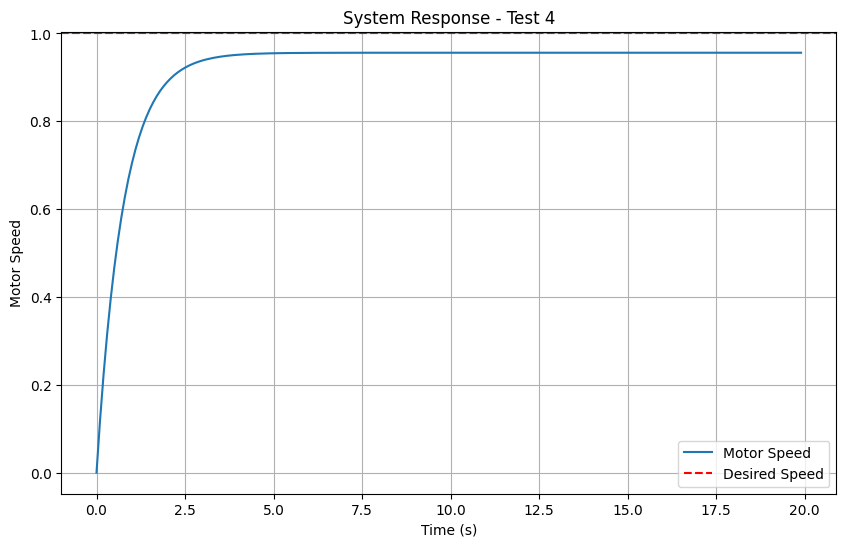


Test 5: PID gains selected: Kp=0.0011, Ki=0.0000, Kd=0.0000
System Parameters: Mass=2.90, Friction=0.38, Time Constant=1.46


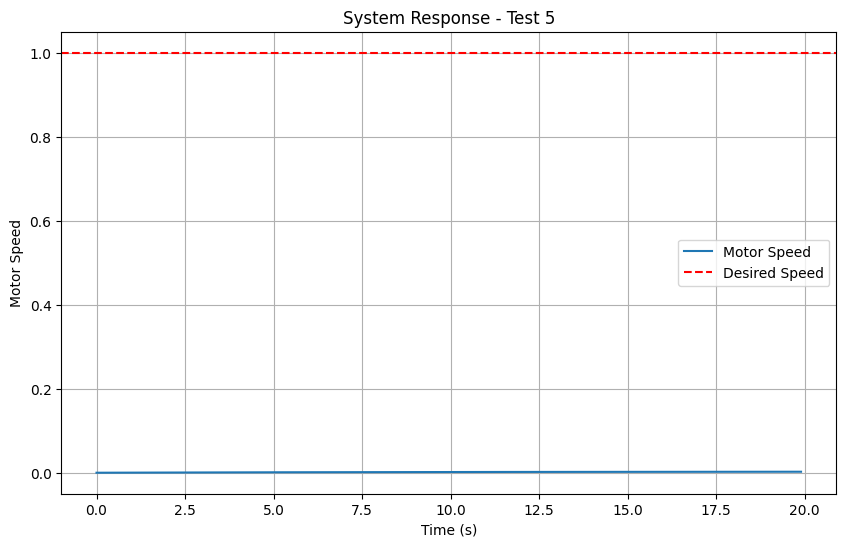


Test 6: PID gains selected: Kp=10.0000, Ki=0.0000, Kd=0.0000
System Parameters: Mass=4.28, Friction=0.44, Time Constant=1.75


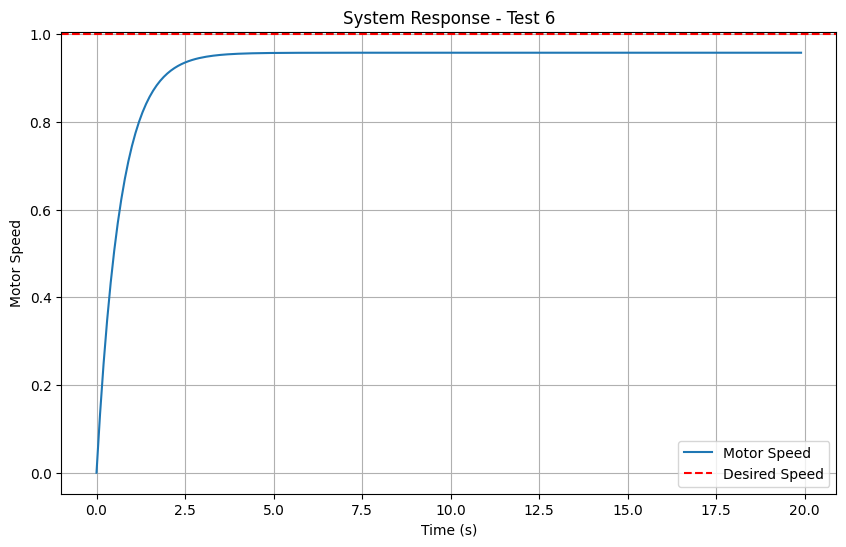


Test 7: PID gains selected: Kp=9.9993, Ki=0.0000, Kd=0.0000
System Parameters: Mass=4.02, Friction=0.73, Time Constant=1.20


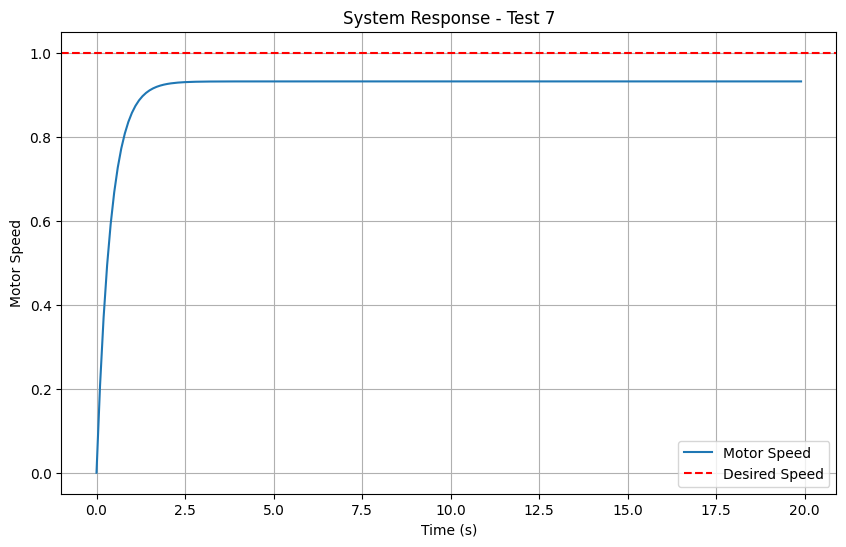


Test 8: PID gains selected: Kp=0.0000, Ki=0.0000, Kd=0.0000
System Parameters: Mass=1.04, Friction=0.67, Time Constant=0.80


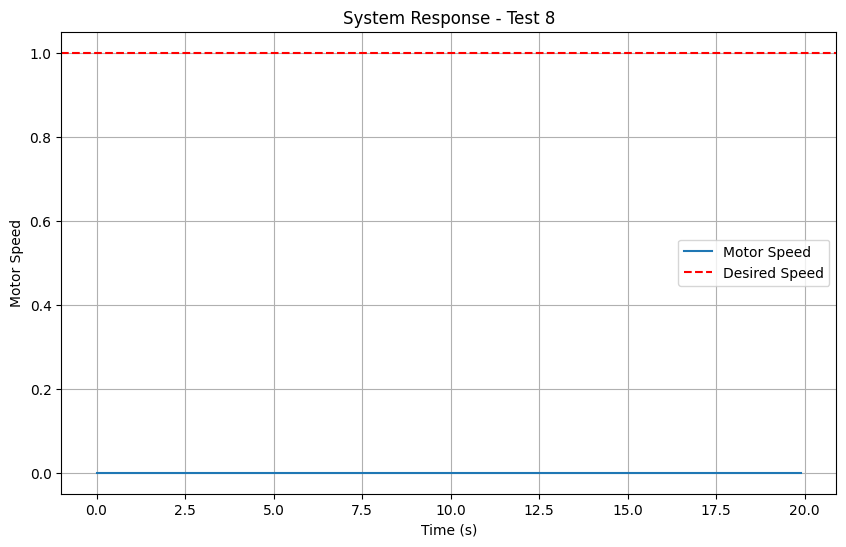


Test 9: PID gains selected: Kp=0.0003, Ki=0.0000, Kd=0.0000
System Parameters: Mass=2.94, Friction=0.99, Time Constant=1.94


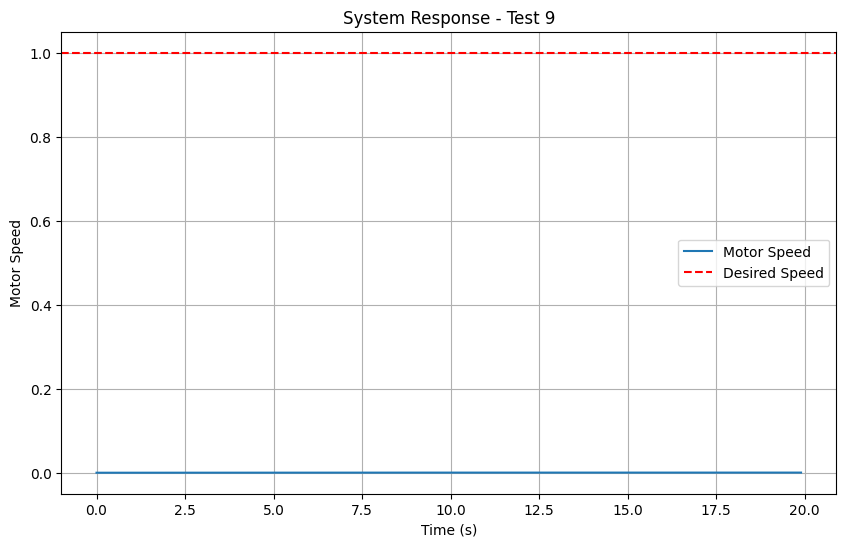


Test 10: PID gains selected: Kp=0.0000, Ki=0.0000, Kd=0.0000
System Parameters: Mass=1.56, Friction=0.44, Time Constant=1.34


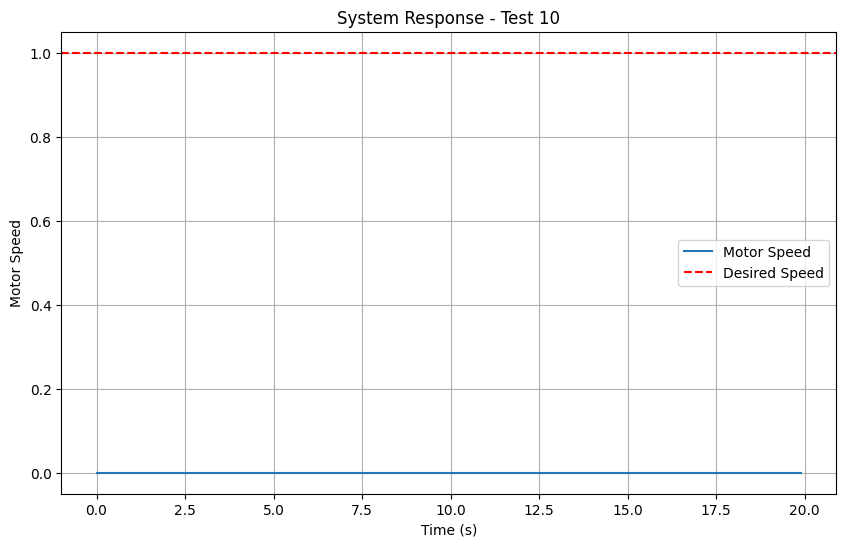


Test 11: PID gains selected: Kp=2.6341, Ki=0.0000, Kd=0.0000
System Parameters: Mass=3.45, Friction=0.81, Time Constant=1.20


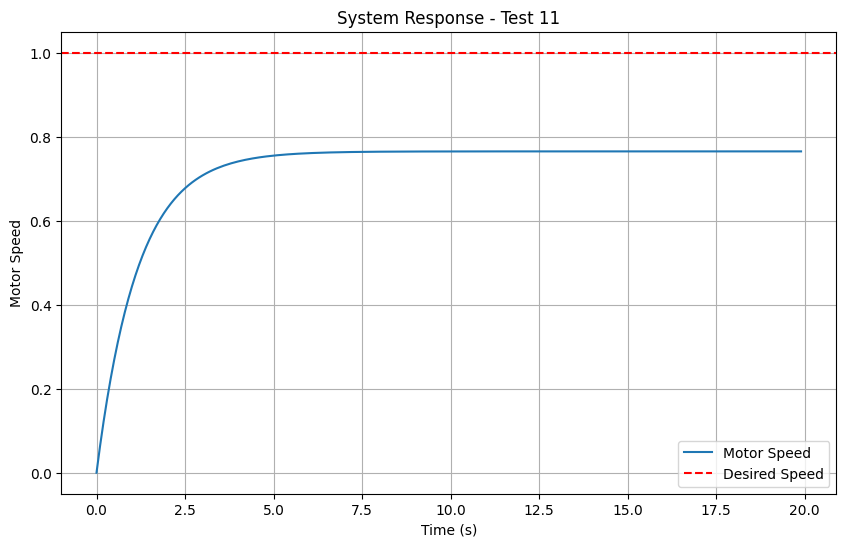


Test 12: PID gains selected: Kp=10.0000, Ki=0.0000, Kd=0.0000
System Parameters: Mass=4.32, Friction=0.19, Time Constant=1.52


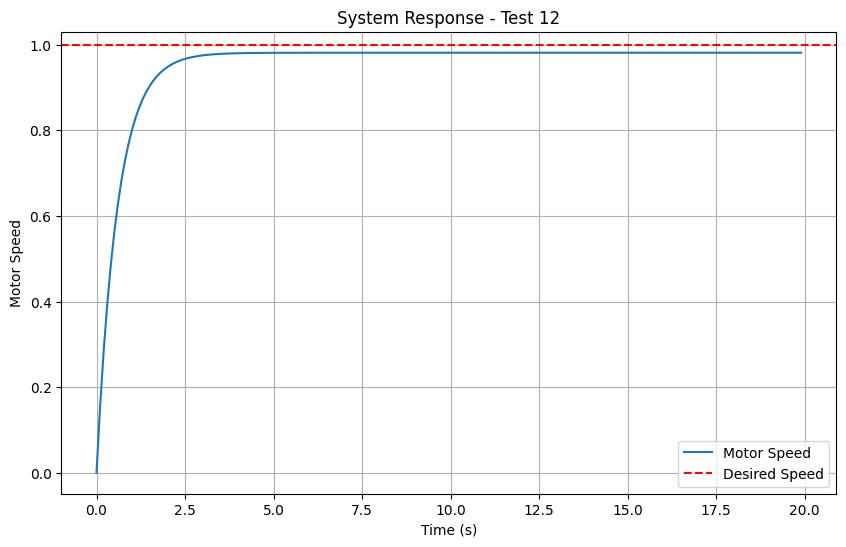


Test 13: PID gains selected: Kp=0.1702, Ki=0.0000, Kd=0.0000
System Parameters: Mass=3.14, Friction=0.73, Time Constant=1.86


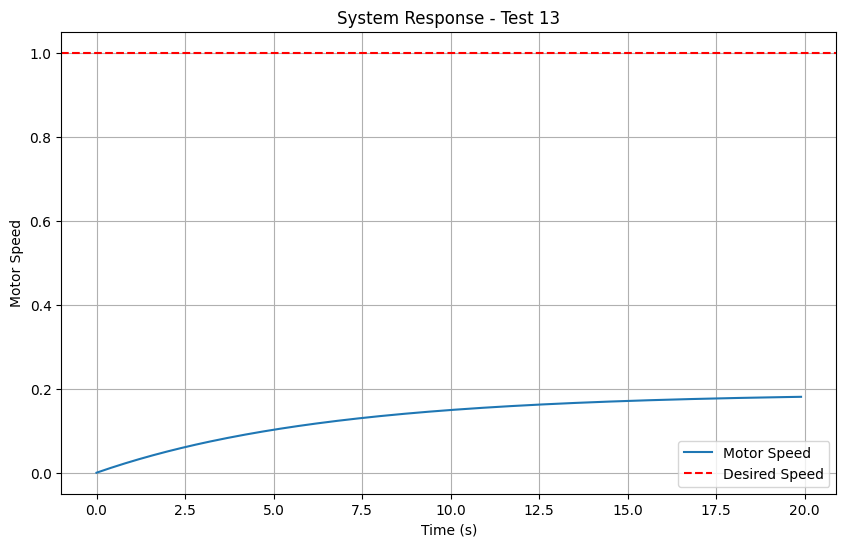


Test 14: PID gains selected: Kp=6.6121, Ki=0.0000, Kd=0.0000
System Parameters: Mass=3.50, Friction=0.88, Time Constant=1.32


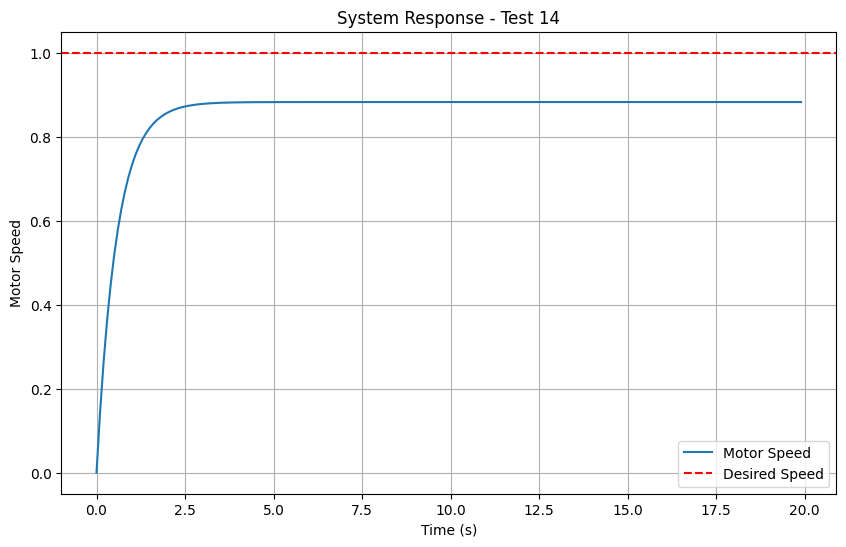


Test 15: PID gains selected: Kp=0.0000, Ki=0.0000, Kd=0.0000
System Parameters: Mass=1.02, Friction=0.51, Time Constant=1.88


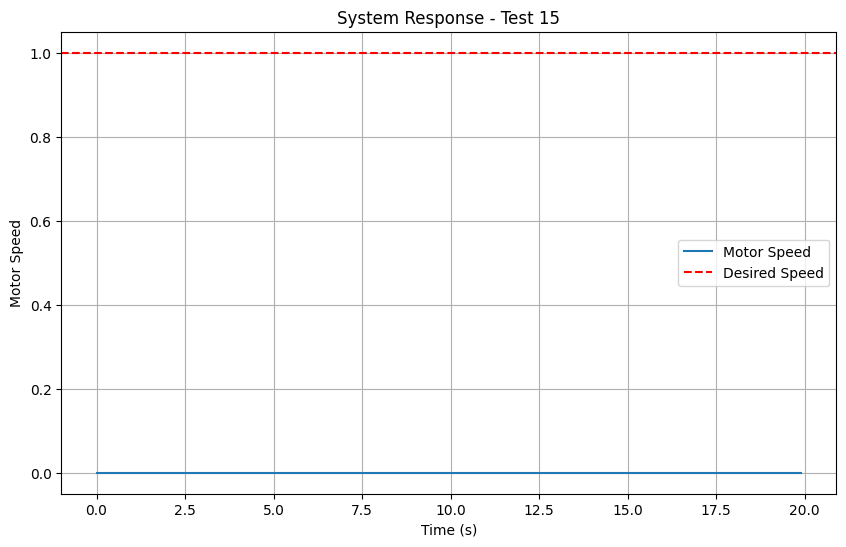


Test 16: PID gains selected: Kp=9.9999, Ki=0.0000, Kd=0.0000
System Parameters: Mass=3.99, Friction=0.70, Time Constant=1.43


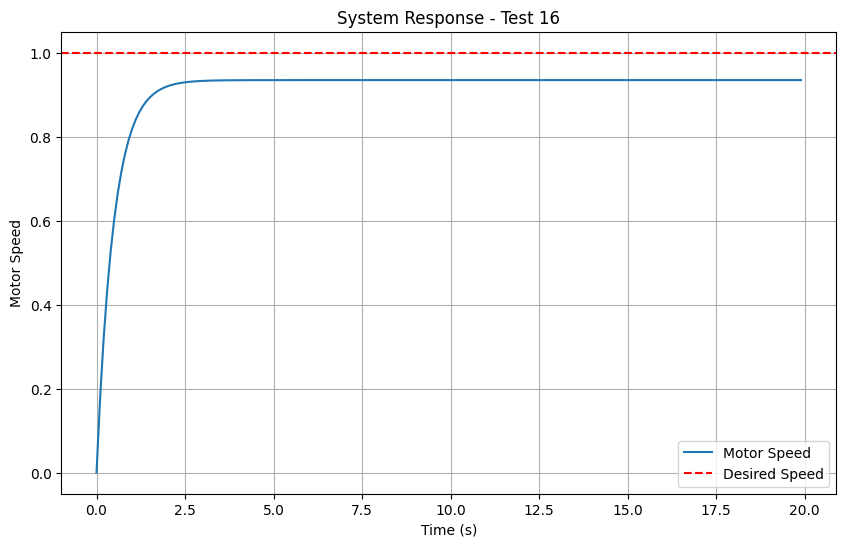


Test 17: PID gains selected: Kp=0.0000, Ki=0.0000, Kd=0.0000
System Parameters: Mass=2.20, Friction=0.97, Time Constant=1.51


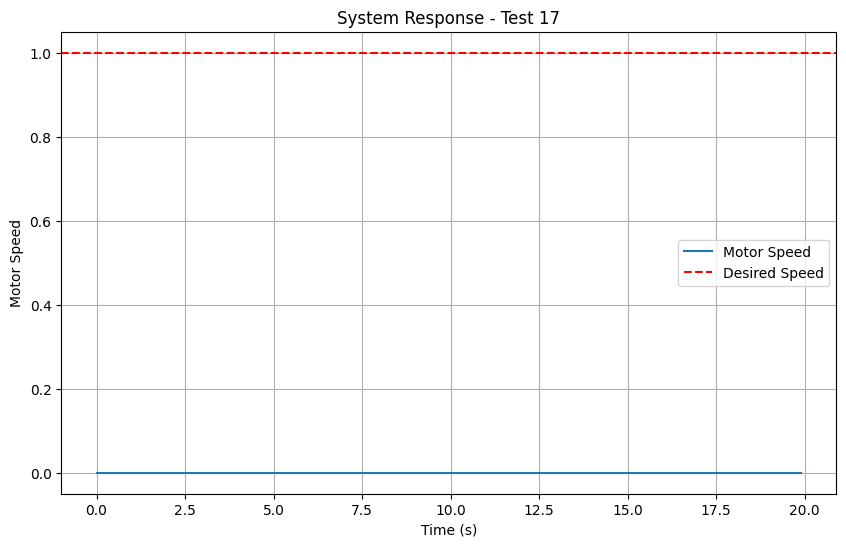


Test 18: PID gains selected: Kp=10.0000, Ki=0.0000, Kd=0.0000
System Parameters: Mass=4.74, Friction=0.77, Time Constant=1.55


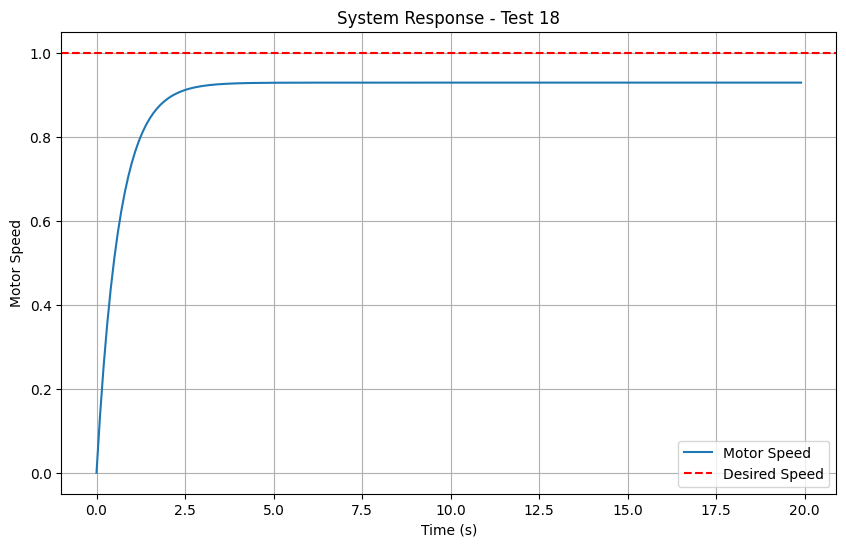


Test 19: PID gains selected: Kp=9.9999, Ki=0.0000, Kd=0.0000
System Parameters: Mass=3.82, Friction=0.38, Time Constant=1.80


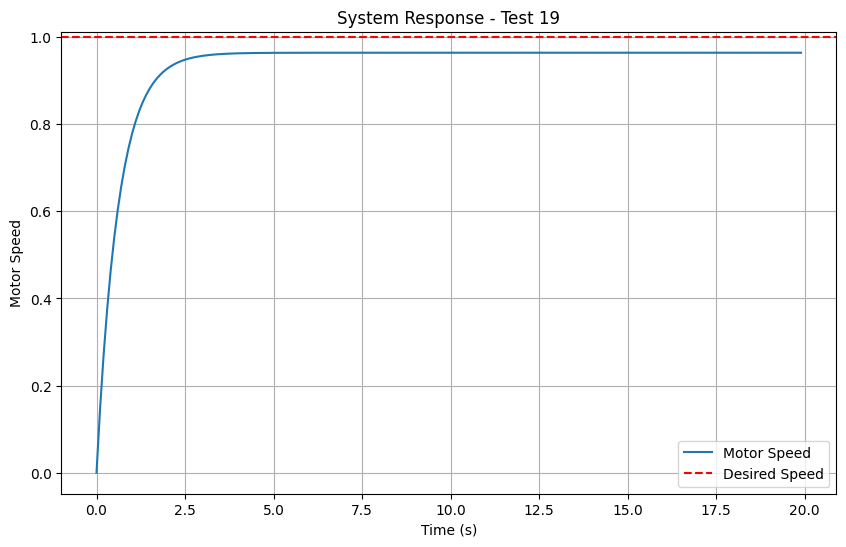


Test 20: PID gains selected: Kp=0.0000, Ki=0.0000, Kd=0.0000
System Parameters: Mass=1.75, Friction=0.93, Time Constant=1.29


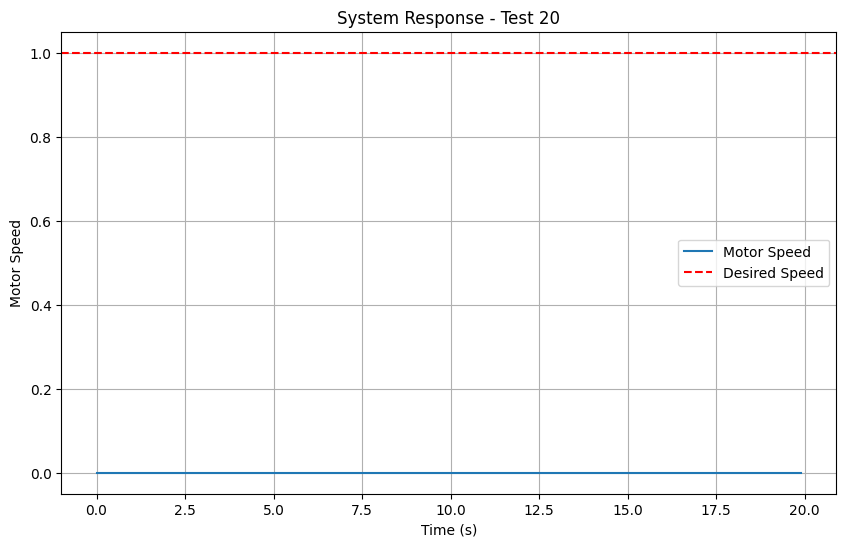

In [29]:
client.test_agent_on_new_system(num_tests=20, total_time=20.0, time_step=0.1)

In [30]:
client.testWithoutNoise()

Total evaluation reward: -199.98696899414062
